### P 103 - Statistical Significance and P-Values

In [1]:
import random

import pandas as pd
import numpy as np

from scipy import stats
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats import power

import matplotlib.pylab as plt

In [3]:
# Function described in the previous notebook (96):
# arguments are: the data to be resampled, size of group A, size of group B 
# in order to maintain the same groups-sizes for the resampled data

def perm_fun(x, nA, nB):
    n = nA + nB      
    idx_B = set(random.sample(range(n), nB))
    idx_A = set(range(n)) - idx_B
    return x.loc[list(idx_B)].mean() - x.loc[list(idx_A)].mean()


Data:
            
Conversion: PriceA =200 PriceB=182

No Conversion: PriceA=23539  PriceB=22406

Observed difference: 0.0368%


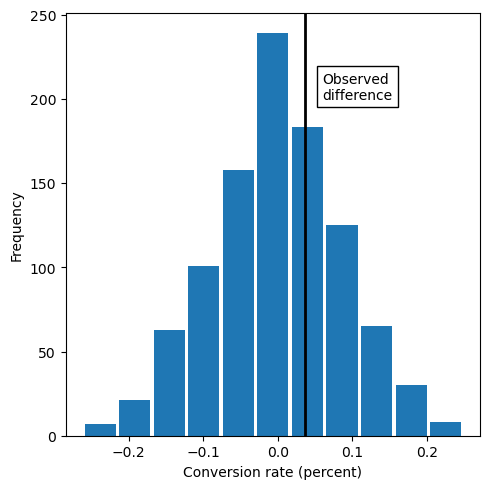

In [5]:
random.seed(1)

    # The observed difference is 0.0368%
    # We can test whether the difference in conversions between prices A and B 
    # is within the range of chance variation, using a resampling procedure.
    
    # First, let's calculate the observed difference in conversion rates
    
    # This is comparing two proportions: 200 successes out of 23,739 attempts in one group 
    # versus 182 successes out of 22,588 attempts in the other group. We multiply by 100 to express it as a percentage. 

obs_pct_diff = 100 * (200 / (23539+200) - 182 / (22406+182))
print(f'Observed difference: {obs_pct_diff:.4f}%')
    # A difference of 0.0368 percentage points
    # Price A converts almost 5% better than price B


    # we create a single series that represents all our data:

n_conversions = 200+182
n_non_conversions = 23539 + 22406

conversion = [0] * n_non_conversions      # Create 45,945 zeros for all the non-conversions
conversion.extend([1] * n_conversions)    # Add a 1 for each conversion
conversion = pd.Series(conversion)        # Convert to a pandas Series for easier manipulation

    # This creates a long series of 0s and 1s where 1 represents a successful conversion and 0 represents no conversion. 
    #It's like having a huge list where each entry represents one customer's outcome - 
    # either they converted (1) or they didn't (0).


# The permutation test:

    # For each permutation, we're:
    # Randomly shuffling all our outcomes (the 0s and 1s)
    # Splitting them into two groups of sizes 23,739 and 22,588 (our original group sizes)
    # Calculating the difference in conversion rates between these random "reshuffled" groups
    # Multiplying by 100 to get percentages
    # Doing this 1000 times to create our null distribution, and storing it into "perm_diffs"

    # The perm_diffs function takes three parameters:
    # x: Your data to be permutated (the whole "united" dataset)
    # nA: The size of group A (23539 + 200)
    # nB: The size of group B (22406+182)

    # Returns the difference of the means for the two newly created reshuffled groups
    # We store these 1000x permutation mean-differences in perm_diffs

perm_diffs = [100 * perm_fun(conversion, 23739, 22588) 
              for _ in range(1000)]

    # We plot the histogram of these 1000x means and see where the original difference-of-means fall:

fig, ax = plt.subplots(figsize=(5, 5))
ax.hist(perm_diffs, bins=11, rwidth=0.9)
ax.axvline(x=obs_pct_diff, color='black', lw=2)
ax.text(0.06, 200, 'Observed\ndifference', bbox={'facecolor':'white'})
ax.set_xlabel('Conversion rate (percent)')
ax.set_ylabel('Frequency')

plt.tight_layout()
plt.show()


    # See the histogram of 1,000 resampled results. As it happens, in this case
    # the observed difference of 0.0368% is well within the range of chance variation.

0.03675791182059275

In [6]:
# Small note on how much percent difference is there between the two conversion rates
precentA = (200 / (23539+200))
precentB =  (182 / (22406+182))
percentA_B = precentA/precentB-1
print (f"Percent difference between the conversion rates: {(percentA_B*100):.2f}%")

Percent difference between the conversion rates: 4.56%


This creates a histogram showing what differences we might expect to see by chance if there were no real difference between the groups. 

The black vertical line shows our actual observed difference. If this line falls far out in the tails of the distribution, it suggests our observed difference is unlikely to have occurred by chance.

To determine statistical significance, we compare where our observed difference falls in relation to this null distribution. 

If our observed difference is more extreme than 95% of the random permutations (equivalent to p < 0.05), we would typically consider the difference statistically significant.

### P-Value


Simply looking at the graph is not a very precise way to measure statistical signifi‐ cance, so of more interest is the p-value.

This is the frequency with which the chance model produces a result more extreme than the observed result.

We can estimate a p- value from our permutation test by taking the proportion of times that the permuta‐ tion test produces a difference equal to or greater than the observed difference

In [9]:
    # If np.mean is applied to a list of booleans, it gives the percentage of how often True was found in the list (#True / #Total).

    # diff > obs_pct_diff: This is comparing each permuted difference (diff, created for the iterable) 
    # with an observed percentage difference (obs_pct_diff). 
    # For each comparison, it returns True and False.
    # The list comprehension performs the comparison for every permuted difference in perm_diffs

    # np.mean() - mean function: When you take the mean of boolean values, True is treated as 1 and False as 0. 
    # So this calculates the proportion of True values.

    # This code is calculating the proportion of permuted differences that are greater than the observed difference. 
    # In the context of a permutation test, this is equivalent to the p-value for a one-sided test

    # It prints 0.332, it means that 33.2% of the permuted differences were larger than the observed difference. 
    # In a permutation test, we're asking "how unusual is our observed result if there was actually no real effect?" 
    # We generate many random permutations of the data to see what differences we might expect to see by chance alone. 
    # Each permutation gives us one possible difference that could occur under the null hypothesis (the hypothesis 
    # that there's no real effect).

    # The p-value of 0.332 tells us that when we randomly shuffled the data many times, about one-third of those random shuffles 
    # produced a difference larger than what we actually observed in our real data.

    # If our observed difference was very unusual (indicating a real effect), we'd expect to see a small p-value like 0.05 or less, 
    # meaning only 5% or fewer of random shuffles produced a larger difference.
    # But we got 0.332, meaning 33.2% of random shuffles produced larger differences. 
    # This suggests our observed difference is quite ordinary - something we could easily see just by chance.

print(np.mean([diff > obs_pct_diff for diff in perm_diffs]))

0.332


In [11]:
    # This creates a 2x2 contingency table using NumPy, for the data provided at the start of the challange
survivors = np.array([[200, 23739 - 200], [182, 22588 - 182]])

    # The chi2_contingency() function performs a chi-square test of independence to determine if there's a significant
    # It tests whether there is a significant association between the groups and conversion rates.
    # Null hypothesis (H0): The two groups have the same conversion probabilities.
    # Alternative hypothesis (H1): The conversion probabilities differ between the groups.
    
    # relationship between two categorical variables. It returns several values:

    # chi2: the chi-square statistic
    # p_value: the two-sided p-value (two-sided by default).
    # df: degrees of freedom
    # (The "_" captures any additional return values we're not using like "Expected frequencies" under the null hypothesis (unused here))

chi2stat, p_value, df, _ = stats.chi2_contingency(survivors)

    # The normal approximation yields a p-value of 0.3498, which is close to the p-value obtained from the permutation test.

    # we're dividing the p-value by 2. This converts the two-sided p-value from the chi-square test into a one-sided p-value. 
    # We do this when we're only interested in testing in one direction 
    # (for example, if we're only interested in whether one group has a higher rate than the other, not just whether they're different).

    # This section is testing the same hypothesis, just using different statistical methods:

    # - The permutation test we discussed earlier (with p=0.332) used resampling
    # - This chi-square test uses a theoretical probability distribution

    # Both approaches are valid ways to test for differences between groups, though they make slightly different assumptions about the data. 
    # The fact that you're dividing the chi-square p-value by 2 suggests you're specifically interested in testing whether one group 
    # has a higher rate than the other, rather than just testing for any difference between the groups.

    

print(f'p-value for single sided test: {p_value / 2:.4f}')

# Here's what's happening under the hood: The chi-square test first calculates whether there's any difference between the groups 
# (in either direction). This is like our two-sided test in the graph. 
# The p-value it returns tells us "what's the probability of seeing a difference this extreme or more extreme in either direction?"
# But in our case, you likely had a specific hypothesis about which group should be higher. 
# Maybe you expected the first group to have a higher success rate than the second group, or vice versa. 
# This is where the one-sided test comes in.

# A one-sided test is appropriate if you're only interested in deviations in a specific direction 
# For symmetric tests like the chi-squared test:
#    Two-sided p-value = probability of observing an effect as extreme as (or more extreme than) the observed in either direction.
#    One-sided p-value = half of the two-sided p-value.

p-value for single sided test: 0.3498


In a two-sided test, we're looking at both tails of the distribution - we care about deviations in either direction from the null hypothesis. The p-value represents the probability of seeing a result as extreme as ours or more extreme in either direction.
In a one-sided test, we're only looking at one tail - we only care about deviations in one specific direction. This is actually why we divide by 2, not multiply. Here's why:
Think about a standard chi-square test result with p = 0.10. This 0.10 represents:

0.05 probability in one tail
0.05 probability in the other tail
Total = 0.10 for both tails combined

When we want to do a one-sided test, we only care about one of those tails. So we take HALF of the total probability: 0.10 ÷ 2 = 0.05

If we multiplied by 2 instead, we'd be doubling the probability in both tails, which would actually make our test less stringent, not more stringent as you correctly intuited we should do for a one-sided test.


The key insight is that one-sided tests have more power because they use all of the α in one direction. They can detect smaller effects in the direction of interest, but they can't detect effects in the opposite direction at all.

You're absolutely right to raise this concern, as it touches on a subtle but important detail about the interpretation of p-values and the setup of one-sided vs. two-sided tests. Let’s carefully go through this.
Two-Sided vs. One-Sided Hypotheses

    Two-Sided Test
        The null hypothesis (H0): The two groups have the same survival rates.
        The alternative hypothesis (H1): The survival rates are not equal (could differ in either direction).
        The rejection region is split between both tails of the test distribution.
            For α=0.05, each tail has 0.025 significance.

    One-Sided Test
        The null hypothesis (H0): The survival rate of Group A is less than or equal to that of Group B.
        The alternative hypothesis (H1): The survival rate of Group A is greater than that of Group B.
        The rejection region lies entirely in one tail of the test distribution.
            For α=0.05, the entire 5% rejection region is in the right tail (assuming we test for greater survival).

### Does Halving the Two-Sided p-value Work?

In a symmetric test, like the chi-squared test, halving the two-sided p-value works only if:

    The test statistic is computed such that larger values always correspond to the direction of interest (e.g., greater survival for Group A).
    You're certain that the test statistic lies entirely in the one tail you're interested in.

For example, if you're testing for H1:Survival rate of Group A > Group BH1​:Survival rate of Group A > Group B, and the computed test statistic is positive (indicating greater survival for Group A), then halving the two-sided p-value is valid because you're essentially taking the area under the tail corresponding to your direction of interest.

### More on the halving of the p-value

What Does the Chi-Squared Test Compute?

The chi-squared test computes a test statistic and a corresponding two-sided p-value by default. Here's how this works:

    The chi-squared test measures how far the observed data deviate from the expected data under the null hypothesis (H0).
    The test statistic follows a chi-squared distribution, which is always non-negative (because it’s based on squared differences).
    The two-sided p-value corresponds to the probability of observing a deviation as extreme as the test statistic, considering both tails of the distribution.

Why Halve the Two-Sided P-Value?

In a one-sided hypothesis test, you’re only interested in deviations in a specific direction (e.g., Group A has higher survival than Group B). Let’s break this down:
Two-Sided Hypothesis Test

    Null hypothesis (H0): The survival rates are equal.
    Alternative hypothesis (H1): The survival rates are different (could be higher or lower).
    The two-sided p-value considers both directions (e.g., Group A has higher OR lower survival than Group B).

One-Sided Hypothesis Test

    Null hypothesis (H0): Group A's survival rate is less than or equal to Group B's survival rate.
    Alternative hypothesis (H1): Group A's survival rate is greater than Group B's survival rate.
    The one-sided p-value should consider only the right tail of the chi-squared distribution (i.e., the area beyond the observed test statistic in the direction of interest).

Since the chi-squared test inherently computes a symmetric two-sided p-value, and you’re only interested in half of this area (the right tail), you divide the two-sided p-value by 2.
When Is Halving Valid?

Halving the p-value is valid only when:

    The alternative hypothesis explicitly focuses on one direction (e.g., Group A > Group B).
    The observed test statistic aligns with the direction of the alternative hypothesis.
        If the test statistic suggests the opposite direction (e.g., Group A < Group B in a "greater than" test), you would not halve the p-value but interpret it differently.

### What Does the P-Value Mean?

    A small p-value (e.g., p<0.05) indicates that the observed data are unlikely under the null hypothesis, suggesting a significant deviation between observed and expected frequencies. In this case, you might reject H0.
    A large p-value suggests that the observed data are consistent with the expected data, and there’s no strong evidence against H0H0​.

### Why Halve the Two-Sided P-Value?

The chi-squared test, by default, calculates a two-sided p-value because it is designed to test whether there is any significant difference between the observed and expected frequencies, without assuming a specific direction.

When you perform a one-sided test, you're only interested in deviations in one specific direction (e.g., Group A has a higher survival rate than Group B).

Halving the two-sided p-value isolates the probability of deviations in one tail of the distribution (the "extreme values" in your direction of interest).

## Are All Extreme Values in One Tail? (could they?)

No, not all extreme values are necessarily in one tail. However:

    Chi-Squared Statistic is Always Positive:
        The chi-squared statistic is based on squared differences.
        This means that the test doesn't distinguish whether Oi>Ei (observed is higher than expected) 
        or Oi<Ei (observed is lower than expected). It only measures the magnitude of deviation, not its direction.
        As a result, the test inherently considers both tails of the distribution in the calculation of the p-value.

    Direction in a One-Sided Test:
        In a one-sided test, you're hypothesizing a specific direction (e.g., Group A has greater survival).
        If the observed chi-squared statistic supports this direction, the extreme values are effectively concentrated in the right tail.

By halving the two-sided p-value, you're isolating the area in the right tail, which aligns with your directional hypothesis.

### Chi-Squared Statistic:

    The chi-squared test statistic is inherently non-negative because it's based on squared differences
    This means the chi-squared distribution is asymmetric and only has values on the positive side

Two-Sided P-Value:

    The default p-value from "stats.chi2_contingency()" already accounts for all "extreme values" in the distribution (i.e., the right tail of the curve).
    Since the chi-squared distribution has only one tail (positive values), this "right tail" effectively covers both "extreme directions" in a chi-squared test.

### Why Halve the P-Value?

When you perform a one-sided hypothesis test, you’re hypothesizing a deviation in one specific direction (e.g., Group A > Group B). However, the chi-squared test doesn’t differentiate between directions—it only detects the magnitude of deviation.

To approximate a one-sided test:

    Compute the two-sided p-value using stats.chi2_contingency().
    Divide this two-sided p-value by 2, because:
        The two-sided p-value accounts for deviations in both directions (even though it's one tail of the chi-squared distribution).
        Halving isolates the probability in the direction of interest.


### Key Point

The expression 1 - chi2.cdf(chi2_statistic, df) already gives the probability of observing a test statistic at least as extreme as the observed one in the right tail. It is effectively the two-sided p-value for the chi-squared test because the chi-squared distribution has only one tail.

For a one-sided hypothesis test:

    You halve the two-sided p-value returned by stats.chi2_contingency().


    